<a href="https://colab.research.google.com/github/modraqueeb/IndusVision/blob/main/Task3_MLintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDGE DETECTION TECHNIQUES -


**Sobel Operator:**

The Sobel operator is a gradient-based edge detection technique that uses convolution with two 3x3 kernels: one for detecting horizontal edges and another for detecting vertical edges.
It calculates the gradient in both x and y directions, and the magnitude of the gradient at each pixel is used to identify edges.
Commonly used for detecting general edges in images.



**Canny Edge Detector:**
Canny is a multi-step edge detection algorithm that is considered one of the most optimal for edge detection.
The process involves Gaussian smoothing, gradient calculation (using Sobel), non-maximum suppression (to thin out edges), and edge thresholding.
It uses two thresholds: a lower and upper threshold for edge detection.

**Prewitt Operator:**
Similar to Sobel, Prewitt is another gradient-based operator used for edge detection.
The Prewitt operator also uses 3x3 kernels to calculate the gradient in the horizontal and vertical directions.
It is slightly simpler than Sobel and is less sensitive to noise.

**Roberts Cross Operator**:A simple, quick edge detection operator that uses 2x2 convolution kernels for computing the gradient.
It calculates edges at 45° and 135° angles, focusing on sharp intensity changes at smaller scales compared to Sobel or Prewitt.

---



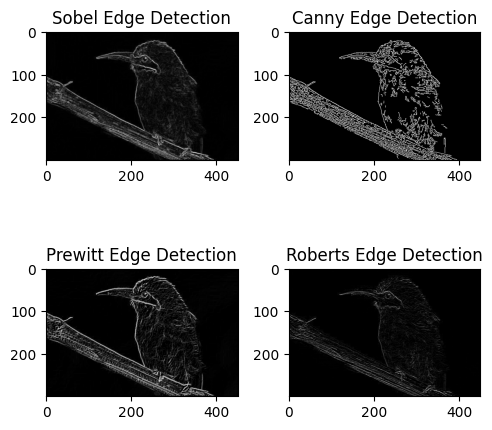

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a random image (you can replace this with any image path)
image = cv2.imread('/content/bird.jpg', cv2.IMREAD_GRAYSCALE)

# Ensure the image is in grayscale for edge detection
if len(image.shape) == 3:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Sobel Edge Detection
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in x direction
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in y direction
sobel_edges = cv2.magnitude(sobel_x, sobel_y)  # Combine both gradients

# 2. Canny Edge Detection
canny_edges = cv2.Canny(image, 100, 200)  # Threshold values can be adjusted

# 3. Prewitt Edge Detection (using kernels)
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)#we have to manuall create the kernel
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)
prewitt_x_edges = cv2.filter2D(image, -1, prewitt_x)#applying kernel to images
prewitt_y_edges = cv2.filter2D(image, -1, prewitt_y)

# Convert to float32 for magnitude calculation
prewitt_x_edges = np.float32(prewitt_x_edges)
prewitt_y_edges = np.float32(prewitt_y_edges)

# Now compute magnitude
prewitt_edges = cv2.magnitude(prewitt_x_edges, prewitt_y_edges)#combines to create overall magnitude

# 4. Roberts Cross Edge Detection (using 2x2 kernels)
roberts_x = np.array([[1, 0], [0, -1]], dtype=np.float32)#creating the kernels manually
roberts_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x_edges = cv2.filter2D(image, -1, roberts_x)#applying kernel to images
roberts_y_edges = cv2.filter2D(image, -1, roberts_y)

# Convert to float32 for magnitude calculation
roberts_x_edges = np.float32(roberts_x_edges)
roberts_y_edges = np.float32(roberts_y_edges)

# Now compute magnitude
roberts_edges = cv2.magnitude(roberts_x_edges, roberts_y_edges)#combines to create overall magnitude

# Displaying the results
plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.title('Sobel Edge Detection')
plt.imshow(sobel_edges, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Canny Edge Detection')
plt.imshow(canny_edges, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Prewitt Edge Detection')
plt.imshow(prewitt_edges, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Roberts Edge Detection')
plt.imshow(roberts_edges, cmap='gray')

plt.tight_layout()
plt.show()


TEMPLATE MATCHING -

Template Matching is a simple technique in image processing and computer vision that is used to find a specific pattern or template within a larger image. It works by sliding the template (a small image) over the target image (also known as the "input image") and comparing the template with the image at every position. This process is repeated until the best match is found.

**How It Works:**

**Template:** A small image or a pattern that you want to find within a larger image.

**Sliding Window:** The template is "slid" over the target image in a sliding window fashion, checking for matches at each position.

**Comparison:** At each position, the similarity between the template and the current patch of the image is measured using a similarity metric (e.g., cross-correlation).

**Best Match:** The position where the template best matches the target image is considered the best match.

Original Image:


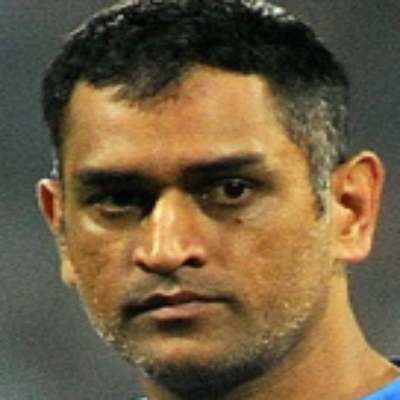

Template Image:


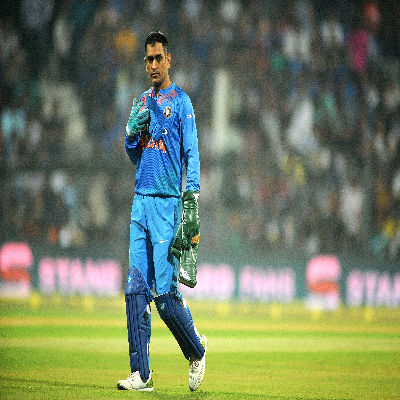

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the function to display images in Colab

# Load the images (replace with your actual image paths)
image = cv2.imread('/content/dhoni.png')  # Replace with the path of the target image
template = cv2.imread('/content/dhoni_template.jpg')  # Replace with the path of the template image

image_resized = cv2.resize(image, (400, 400))  # You can change the size as needed
template_resized = cv2.resize(template, (400, 400))

# Convert to grayscale (optional but recommended for simplicity)
gray_image = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
gray_template = cv2.cvtColor(template_resized, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(gray_image, gray_template, cv2.TM_CCOEFF_NORMED)

# Get the best match position
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# Draw a rectangle around the matched area in the original image
top_left = max_loc
height, width = gray_template.shape
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Display the original image and the result (with the rectangle) in Colab
print("Original Image:")
image = cv2.resize(image_resized, (400, 400))
cv2_imshow(image)  # Display the image with the matched template

# Optionally, display the template image
print("Template Image:")
cv2_imshow(template_resized)  # Display the template image


CONTOUR DETECTION -
 The Process of Contour Detection
The contour detection process typically involves several key steps:

**Grayscale Conversion:**

Convert the image to a grayscale image because contours are easier to detect in a single-channel image.
In grayscale images, intensity values range from 0 (black) to 255 (white), with shades of gray in between.

**Blurring (Gaussian Blur):**
To remove noise, apply a Gaussian filter (or other filters) to smooth the image. Smoothing helps in reducing unwanted details and improving the accuracy of edge detection.

**Edge Detection (Canny, Sobel, etc.)**:Canny Edge Detection is one of the most popular methods. It highlights regions with significant intensity changes (edges).
The gradient of pixel intensities is computed using filters (e.g., Sobel, Prewitt, or Roberts).


**Contour Detection (cv2.findContours):**
Once edges are identified, the contours can be extracted using the findContours function, which identifies continuous curves where the intensity of the image changes significantly.

**Contour Drawing (cv2.drawContours):**

After contours are detected, they can be drawn on the image for visualization.

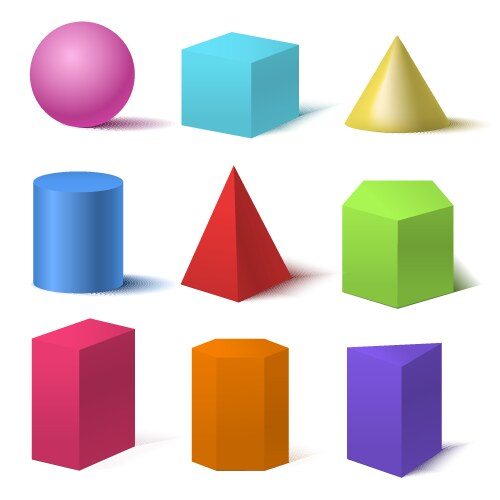

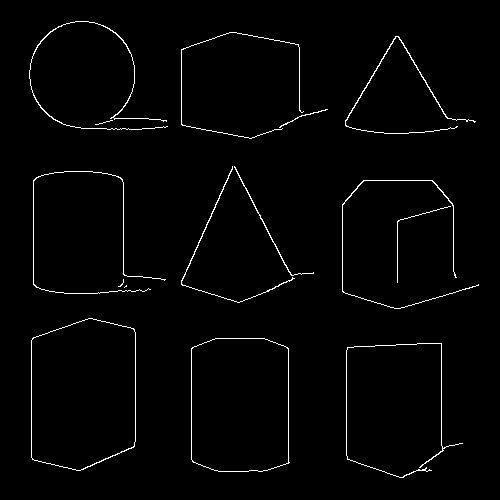

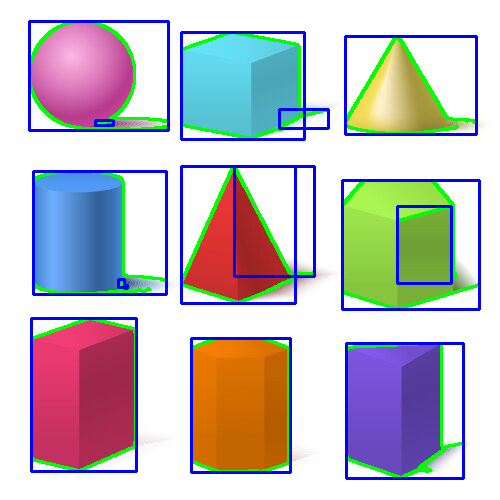

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # This is used to display images in Colab

# Step 1: Load the image
image = cv2.imread('/shapes.jpg')  # Replace with your image path
if image is None:
    print("Error: Image not found.")
    exit()

# Step 2: Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Step 4: Perform edge detection using Canny
edges = cv2.Canny(blurred_image, 50, 150)

# Step 5: Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 6: Draw contours on the original image
image_with_contours = image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)

# Step 7: Draw bounding boxes around detected objects (if any)
for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Draw the bounding box
    cv2.rectangle(image_with_contours, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Step 8: Display the results using cv2_imshow in Colab
cv2_imshow(image)  # Show the original image
cv2_imshow(edges)  # Show the edge-detected image
cv2_imshow(image_with_contours)  # Show the image with contours and bounding boxes

# Step 9: Wait for any key to close the windows (not needed in Colab)
# cv2.waitKey(0)   # This is unnecessary in Colab
cv2.destroyAllWindows()  # Not necessary in Colab


**Understanding Projective Geometry and Its Role in Image Transformation**

Projective geometry is a branch of geometry that studies the properties and invariants of geometric figures under perspective transformations. These transformations include operations such as scaling, rotation, translation, and projection, which are often encountered in image processing and computer vision, particularly in tasks like camera calibration, image stitching, and 3D modeling.

In the context of image processing, projective transformations refer to operations that can map points from one plane to another (often involving a perspective shift) while maintaining certain geometric properties.